<a href="https://colab.research.google.com/github/SubbulakshmiSN/CreditCardFraudDetection_Imbalace/blob/main/credit_card_case_study_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Credit Card Detection Fraud Imbalance data Casestudy*

### *IMPORT LIBRARIES*

In [9]:
import pandas as pd
import numpy as np

#statistic
from scipy import stats

#preprocessing
from sklearn.preprocessing import StandardScaler

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default="vscode" # for plotly plots
import matplotlib.pyplot as plt
import seaborn as sns


#Supress Warnings

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


#Machine Learning
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report



### *READ THE DATA*

In [10]:
df= pd.read_csv("creditcardcsv.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### *DATA OBSERVATION*

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
'''
supervised learning


Dependent Variable: Class
Independent Variables: Time, Amount

continuous: Time, Amount, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28
Categorical: Class
'''

' \nsupervised learning\n\n\nDependent Variable: Class\nIndependent Variables: Time, Amount\n\ncontinuous: Time, Amount, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28\nCategorical: Class\n'

In [15]:
df.Class.unique()

array([0, 1])

In [16]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### *DATA HANDLING*

In [17]:
df.isnull().sum()
#no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df.duplicated().sum()

1081

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [21]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,...,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,...,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,...,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


### *DATA VISUALIZATION*

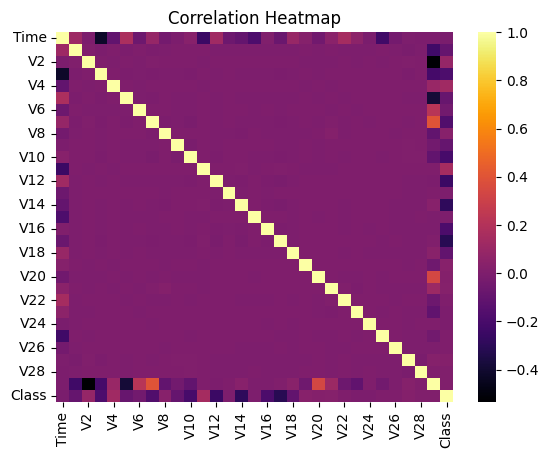

In [22]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

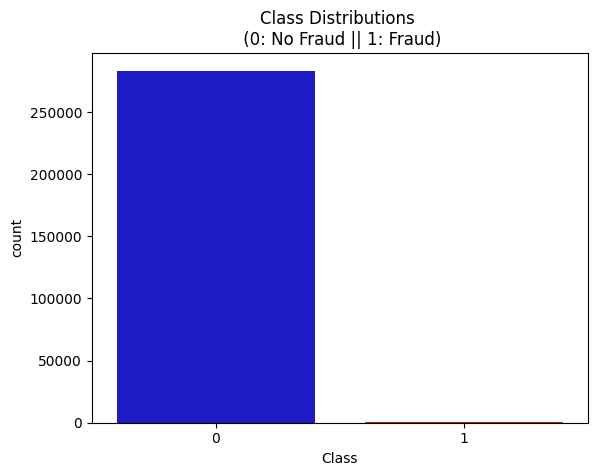

In [23]:
colors= ["#0101DF", "#DF0101"]
sns.countplot(x="Class", data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

<Figure size 800x600 with 0 Axes>

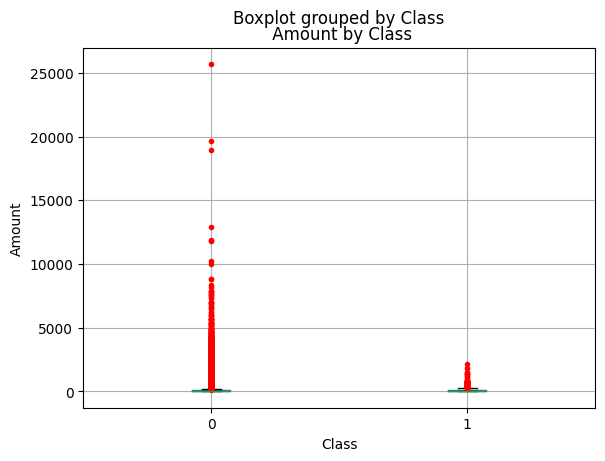

In [24]:

plt.figure(figsize = (8, 6))
df.boxplot(column = "Amount", by = "Class", sym = "r.")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title(" Amount by Class")
plt.show()

<Figure size 800x600 with 0 Axes>

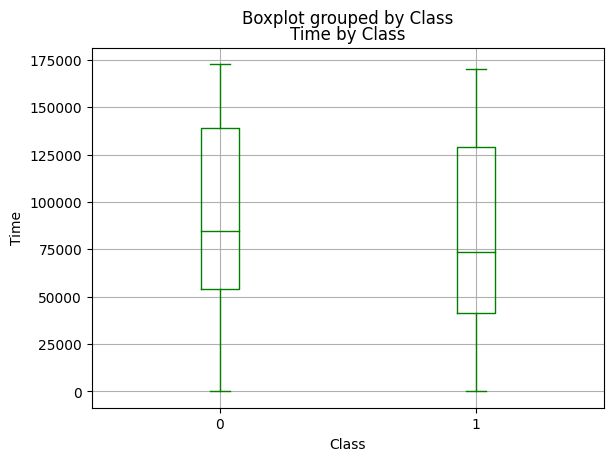

In [25]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Time", by = "Class", sym = "r.",color='green')
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("Time by Class")
plt.show()

In [26]:
#Time data is removing from  datasets to preserve anonymity, protect privacy, and focus on transaction patterns without sacrificing model generalization
df = df.drop(['Time'],axis=1)

In [27]:
scale=StandardScaler()
df['Amount']=scale.fit_transform(df['Amount'].values.reshape(-1, 1))


In [28]:
df.head().T

,0,1,2,3,4
V1,-1.36,1.19,-1.36,-0.97,-1.16
V2,-0.07,0.27,-1.34,-0.19,0.88
V3,2.54,0.17,1.77,1.79,1.55
V4,1.38,0.45,0.38,-0.86,0.40
V5,-0.34,0.06,-0.50,-0.01,-0.41
V6,0.46,-0.08,1.80,1.25,0.10
V7,0.24,-0.08,0.79,0.24,0.59
V8,0.10,0.09,0.25,0.38,-0.27
V9,0.36,-0.26,-1.51,-1.39,0.82
V10,0.09,-0.17,0.21,-0.05,0.75


### *MACHINE LEARNING*

In [29]:
#Seperating the dependent and independent variable
x = df.drop(columns = 'Class', axis = 1)
y = df['Class']

In [30]:
#under sampling
from imblearn.under_sampling import NearMiss
model= NearMiss()
x_under_resampled, y_under_resampled = model.fit_resample(x, y)
x_under_resampled.shape, y_under_resampled.shape

((946, 29), (946,))

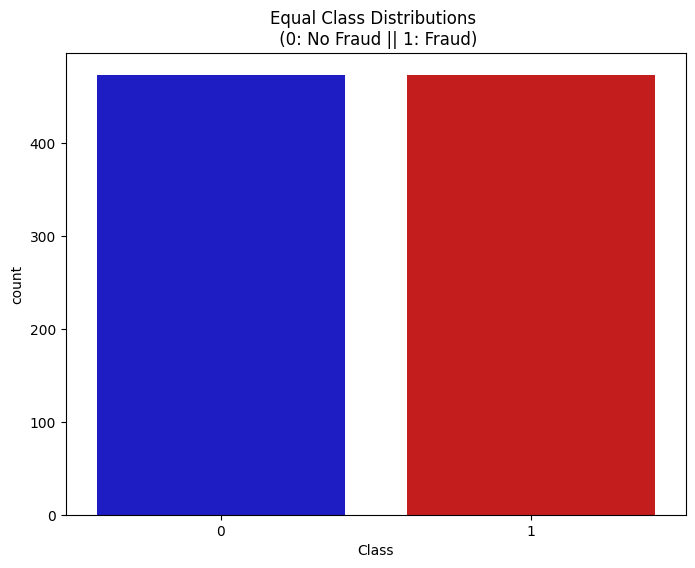

Class
0   0.50
1   0.50
Name: count, dtype: float64


In [31]:
plt.figure(figsize = (8, 6))
colors= ["#0101DF", "#DF0101"]
sns.countplot(x = y_under_resampled, palette = colors)
plt.title("Equal Class Distributions \n (0: No Fraud || 1: Fraud)")
plt.show()
print(y_under_resampled.value_counts()/len(y_under_resampled))

### *EVALUATION*

In [54]:
class classifier():
    def __init__(self, x,y):
        self.model = {
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier(),
            'Decision Tree': DecisionTreeClassifier(),

          }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.25)

    def  evaluate(self, model_name, model):
        y_train_pred=model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred=model.predict(self.x_test)

        result= {
            'Model': model_name,
            'Train Accuracy': accuracy_score(self.y_train, y_train_pred),
            'Test Accuracy': accuracy_score(self.y_test, y_test_pred),
            'Train Precision': precision_score(self.y_train, y_train_pred),
            'Test Precision': precision_score(self.y_test, y_test_pred),
            'Train Recall': recall_score(self.y_train, y_train_pred),
            'Test Recall': recall_score(self.y_test, y_test_pred),
            'Train F1': f1_score(self.y_train, y_train_pred),
            'Test F1': f1_score(self.y_test, y_test_pred),

        }

        return result

    def best_model(self):
        results=[self.evaluate(name, model) for name, model in self.model.items()]
        self.best_model_score=pd.DataFrame(results)
        return self.best_model_score

    def plot_test_accuracies(self):
        # Ensure the best model scores are calculated
        if not hasattr(self, 'best_model_score'):
            self.best_model()

        # Plotting the test accuracies as a bar chart
        plt.figure(figsize=(6, 4))
        colors = ['blue', 'green', 'red']
        plt.bar(self.best_model_score['Model'], self.best_model_score['Test Accuracy'], color=colors)
        plt.xlabel('Model')
        plt.ylabel('Test Accuracy')
        plt.title('Test Accuracy of Different Models')
        plt.show()


In [58]:
#train and find best classifier models
models=classifier(x_under_resampled,y_under_resampled)
best=models.best_model()
best


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,0.96,0.97,0.99,0.98,0.93,0.96,0.96,0.97
1,Random Forest,1.00,0.97,1.00,0.99,1.00,0.94,1.00,0.97
2,Decision Tree,1.00,0.95,1.00,0.95,1.00,0.95,1.00,0.95


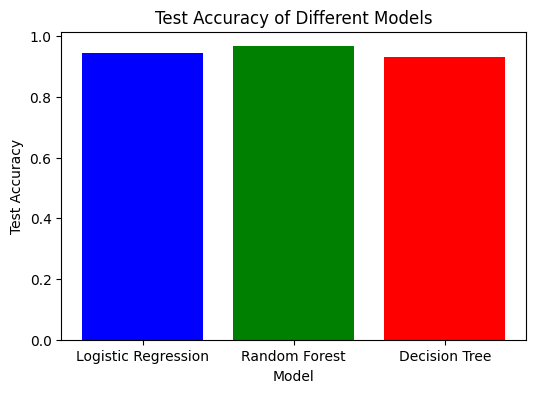

In [57]:
models.plot_test_accuracies()


In [ ]:
'''
Random forest is the best model which have good testing accuracy doesnt have overfitting